## 目录
* 什么是RNN
* RNN模型结构
* RNN前向传播
* RNN后向传播  
--RNN梯度消失/爆炸
* RNN应用

# 什么是RNN
RNN （Recurrent neural Network）是循环神经网络，也称递归神经网络，属于深度学习神经网络，主要用于处理序列化数据。以下通过最基本的RNN模型结构、前向传播、后向传播流程了解RNN基本原理。

# RNN结构

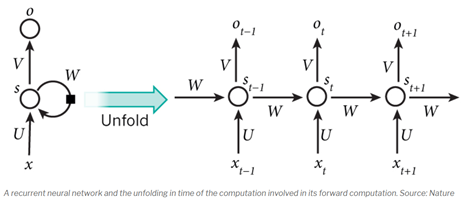
注解：
* 输入单元集标记为{x0,x1,...,xt,xt+1,...}
* 隐藏单元集标记为{s0,s1,...,st,st+1,...}
* 输出单元集则被标记为{O0,O1,...,Ot,Ot+1.,..}  

上图将循环神经网络进行展开成一个全神经网络,神经网络在t时刻的输出是通过t-1时刻的状态和t时刻的输入共同计算出来。‘循环’意指神经网络在t时刻的状态(信息记忆）会通过参数W向t+1时刻传递。

要注意的是，**在t时刻x的输入通常是单个词/字的向量**。例如:对一个包含5个词的语句，展开的网络便是一个5层的神经网络，**时间方向上每一层代表一个词**。

# RNN前向传播

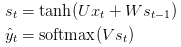

注解：  
$x_t$: 第t时间的输入，通常为单个字/词的one-hot或word2vec向量  
$s_t$: 隐藏层的第t步的状态，根据当前输入层的输出与上一步隐藏层的状态计算  
$\hat{y_t}$: 第t步的输出，如：下个单词的向量表示，$\hat{y_t}$=softmax(V$s_t$)

损失函数
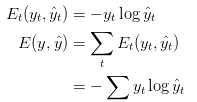

注解：
* $E_t(y_t,\hat{y}_t)$:神经网络在t时刻的损失  
* $E(y,\hat{y})$:神经网络在t时刻及t时刻以前所有时刻损失的和

# 后向传播


后向传播过程中，我们需要计算误差对参数U、V和W的梯度，然后借助SDG算法来更新参数。
在RNNs中，每输入一步，每一层各自都共享参数U,V,W，大大地降低了网络中需要学习的参数。以下图以E3为例
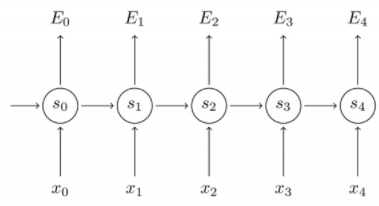



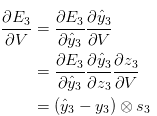

注释：  
$z_3=Vs_3$  
圈圈符号代表外积

从以上例子可以看出，这里误差E3对V的偏导值比较容易求得，因为它可以由当前层的值$\hat{y}_3,y_3,s_3)$直接求出。而求误差E3对参数W和U的偏导就复杂的多。
以W为例，其中，$s_3 = tanh(Ux_3 + Ws_2)$ 取决于$s_2$，而$s_2$则取决于W和$s_1$，以此类推。因此，如果要推导参数W，就不能简单将s_2视作常量，需要再次应用链式法则，真正得到的是:
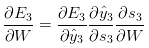

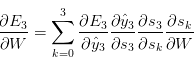

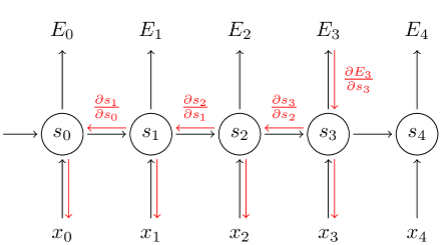

back propagation through time(bptt)与我们在深度神经网络中应用的标准反向传播算法完全一致。主要区别在于我们对每时间步的参数W的梯度进行了求和。

### RNN的梯度消失/爆炸问题

t3时刻的误差$E_3$对W的偏导可以改写成以下形式：
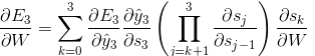

由于$s_j = tanh(Ux_j + Ws_{j-1})$ ,对任意时刻t，上式括号中的式子可转化为：

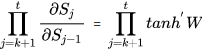

Tanh函数的导数值域为(0,1]。如果t很大，当W是大于0小于1的值，上式会趋近于0（梯度消失）；当W是大于1的值，上式会趋近于无穷大（梯度爆炸）。

## RNN应用
RNN模型的数据输入和输出非常灵活，以下五种RNN模型结构可以分别对应**Vanilla神经网络、图片标题生成、情感分析、机器翻译、下文预测**应用场景。

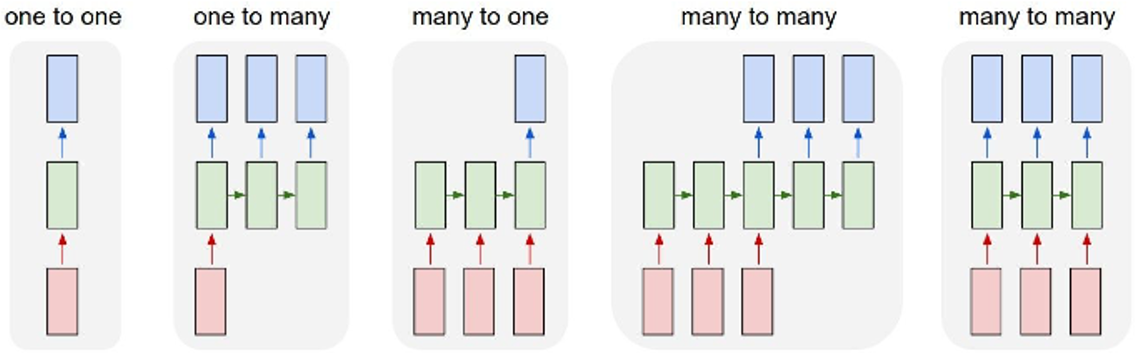


# 参考文献  
http://suriyadeepan.github.io/2017-02-13-unfolding-rnn-2/  
https://r2rt.com/recurrent-neural-networks-in-tensorflow-i.html  
https://github.com/pangolulu/rnn-from-scratch  
https://theneuralperspective.com/2016/10/04/05-recurrent-neural-networks-rnn-part-1-basic-rnn-char-rnn/  
主要参考：http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/  
http://blog.csdn.net/jojozhangju/article/details/51982254  